In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
from sklearn.decomposition import PCA
import warnings
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

df = pd.read_csv('heart_disease.csv')

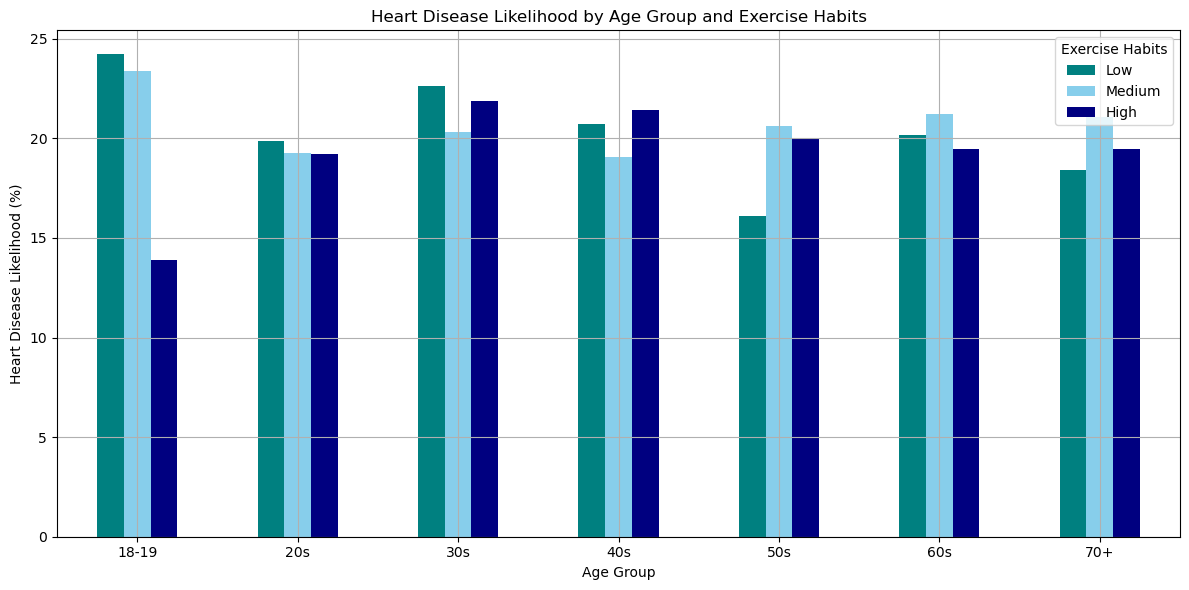

In [62]:
def age_group(age):
    if age in [18, 19]:
        return '18-19'
    elif age < 30:
        return '20s'
    elif age < 40:
        return '30s'
    elif age < 50:
        return '40s'
    elif age < 60:
        return '50s'
    elif age < 70:
        return '60s'
    else:
        return '70+'
    
df['Age_Group'] = df['Age'].apply(age_group)

df['Exercise'] = df['Exercise Habits']

grouped = df.groupby(['Age_Group', 'Exercise Habits'])['Heart Disease Status'].apply(
    lambda x: (x == 'Yes').mean() * 100
).reset_index(name='Heart Disease Likelihood')

age_order = ['18-19', '20s', '30s', '40s', '50s', '60s', '70+']

pivot_df = grouped.pivot(index='Age_Group', columns='Exercise Habits', values='Heart Disease Likelihood')

pivot_df = pivot_df.reindex(age_order)

pivot_df[['Low', 'Medium', 'High']].plot(kind='bar', figsize=(12, 6),color=['teal', 'skyblue', 'navy'])
plt.title('Heart Disease Likelihood by Age Group and Exercise Habits')
plt.xlabel('Age Group')
plt.ylabel('Heart Disease Likelihood (%)')
plt.xticks(rotation=0)
plt.legend(title='Exercise Habits')
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/dd/r7y_r9l9265bts06z2ggjtj40000gn/T/ipykernel_10227/1430628397.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/dd/r7y_r9l9265bts06z2ggjtj40000gn/T/ipykernel_10227/1430628397.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




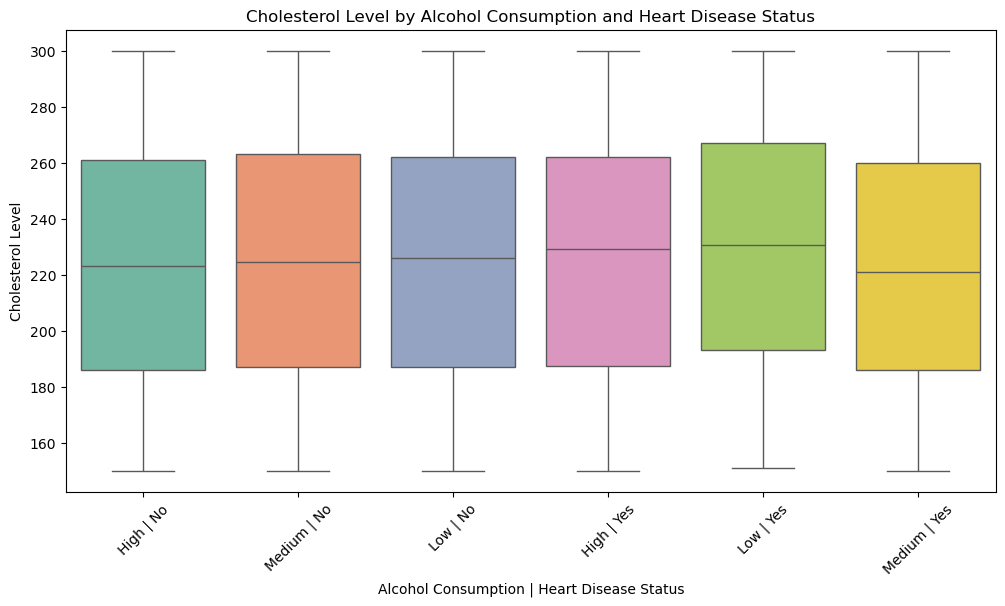

In [63]:
filtered_df = df[['Cholesterol Level', 'Alcohol Consumption', 'Heart Disease Status']]

filtered_df['Group'] = filtered_df['Alcohol Consumption'] + ' | ' +filtered_df['Heart Disease Status']

plt.figure(figsize=(12, 6))
sns.boxplot(x='Group', y='Cholesterol Level', data=filtered_df, palette='Set2')
plt.title('Cholesterol Level by Alcohol Consumption and Heart Disease Status')
plt.xlabel('Alcohol Consumption | Heart Disease Status')
plt.ylabel('Cholesterol Level')
plt.xticks(rotation=45)
plt.show()

In [66]:
heart_disease_df = df[df['Heart Disease Status'] == 'Yes']
subset = heart_disease_df[['Age', 'Cholesterol Level', 'Triglyceride Level']].dropna()

X = subset['Age']
Y = subset['Cholesterol Level']
Z = subset['Triglyceride Level']

x_line = np.linspace(X.min(), X.max(), 20)
y_line = np.linspace(Y.min(), Y.max(), 20)
x_line, y_line = np.meshgrid(x_line, y_line)
z_line = griddata((X,Y), Z, (x_line, y_line), method='cubic')


fig = go.Figure(data=[go.Surface(z=z_line, x=x_line, y=y_line, colorscale='Viridis')])
fig.update_layout(
    title='3D Surface Plot of Cholesterol Level vs Age vs Triglyceride Level\nof those with Heart Disease',
                  scene=dict(
                      xaxis_title='Age', 
                      yaxis_title='Cholesterol Level', 
                      zaxis_title='Triglyceride Level'),
                  width=800, height=600)

fig.show()